**Objective: Build a Lie Detector Model**
- **Purpose**: Predict the future outcome for an individual in the program:
  - Complete Program Successfully: 1
  - Discharge from the Program on Bad Terms: 0

**Tasks:**
1. **Cleaning Data**: Remove or correct inaccurate records from the dataset.
2. **Formatting Data**: Standardize data formats to ensure consistency.
3. **Merging and Consolidating Data**: Combine data from different sources into a single dataset.
4. **Feature Engineering**: Develop new features that can improve model predictions.
5. **Reducing Data**: Eliminate redundant or irrelevant features to simplify the model.
6. **Ensuring Data Quality**: Verify the accuracy and completeness of the dataset.



**Columns and Their Acronyms:**
- **Permanency/Navigating Welfare System (PWS)**
- **Daily Living (DL)**
- **Self Care (SC)**
- **Relationships & Communication (RC)**
- **Housing & Money Management (HMM)**
- **Work & Study Life (WSL)**
- **Career & Education Planning (CEP)**
- **Looking Forward (LF)**


In [20]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
 

In [21]:
# Make sure you're using the correct path and file name
thp_df = pd.read_excel("/Users/oakmoreroadinc./Desktop/Data Science /Portfolio Data Science /R_script.R/data/1.after_statistical_analysis_R.xlsx")
thp_df.head()
index_col=0

In [22]:
# Strip leading and trailing spaces from column names
thp_df.columns = thp_df.columns.str.strip()

In [23]:
#Find duplicates How many duplicated rows exist in the df? 
duplicate_rows = thp_df.duplicated().sum()
print(f"There are {duplicate_rows} duplicate rows.")


There are 0 duplicate rows.


In [24]:
#Finding Missing Values for all columns.
total_missing_values = thp_df.isnull().sum().sum()
print(f"There are {total_missing_values} missing values in total.")


There are 0 missing values in total.


In [25]:
#finding the total number of rows in the dataframe.
number_of_rows = thp_df.shape[0]
print(number_of_rows)

22


In [26]:
thp_df.columns

Index(['Youth ID', 'Gender', 'PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP',
       'LF', 'Days_in_Program', 'Category', 'Result Score'],
      dtype='object')

In [27]:
thp_df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,Days_in_Program,Category,Result Score
0,1,M,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,264,Good,1
1,2,M,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,467,Good,1
2,3,M,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,49,Bad,0
3,4,M,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,908,Good,1
4,5,F,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,241,Bad,0


#### Feature Engineering 

In [30]:
# Compute sum of scores for each row
row_total = thp_df[['PWS','DL','SC','RC','HMM','WSL','CEP','LF']].sum(axis=1)

# Step 2: Calculate the mean and standard deviation of the row totals
mean_total = row_total.mean()
std_total = row_total.std()

# Step 3: Standardize the total scores by subtracting the mean and dividing by the standard deviation
thp_df['fraud_score'] = (row_total - mean_total) / std_total

# Step 4: Calculate mean score (optional, depending on your use case)
thp_df['mean_score'] = row_total / len(row_total)

thp_df['total_score']=row_total

# Get a list of all column names
cols = list(thp_df.columns)

# Decide the position where you want your new column (next to the column 'LF' in this case)
# Get the index of the column after which you want to place the new column
position = cols.index('LF') + 1

# Reorder the columns
# This will slice all columns up to the position, add the 'total_score' column, and then add the rest
cols = cols[:position] + ['total_score'] + cols[position:-1]

# Reassign the DataFrame columns to the new order
thp_df = thp_df[cols]


# Display the updated DataFrame
thp_df.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_score,mean_score
0,1,M,3.80,4.47,4.41,4.33,3.96,4.10,5.00,5.00,35.07,264,Good,1,0.211725,1.594091
1,2,M,4.00,4.41,4.53,4.78,3.70,4.40,4.10,4.00,33.92,467,Good,1,-0.031427,1.541818
2,3,M,4.30,4.65,4.29,4.78,3.78,4.60,4.11,4.50,35.01,49,Bad,0,0.199038,1.591364
3,4,M,3.55,2.24,2.71,3.83,2.09,2.70,2.11,3.25,22.48,908,Good,1,-2.450257,1.021818
4,5,F,4.90,4.71,4.76,4.83,3.35,4.65,4.78,5.00,36.98,241,Bad,0,0.615568,1.680909


In [31]:
#normalize the data with z-score(fraud_score,mean_score,total_score normalized)
thp_normalized = thp_df.copy()
thp_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF','total_score','fraud_score','mean_score']] = (
    thp_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF','total_score','fraud_score','mean_score']] - 
    thp_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF','total_score','fraud_score','mean_score']].mean()
) / thp_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF','total_score','fraud_score','mean_score']].std()
thp_normalized.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_score,mean_score
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,0.211725,264,Good,1,0.211725,0.211725
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,-0.031427,467,Good,1,-0.031427,-0.031427
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,0.199038,49,Bad,0,0.199038,0.199038
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,-2.450257,908,Good,1,-2.450257,-2.450257
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,0.615568,241,Bad,0,0.615568,0.615568


In [32]:
# Create another copy of the original DataFrame for #fraud_score,mean_score and total_score not normalized

thp_df_not_normalized = thp_df.copy()

# Normalize the data using Z-score (for assesment features only!)
thp_df_not_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF']] = (
    thp_df_not_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF']] - 
    thp_df_not_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF']].mean()
) / thp_df_not_normalized[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF']].std()

# Display the first few rows of the thp_df_not_normalized DataFrame
thp_df_not_normalized.head()

,Youth ID,Gender,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,Category,Result Score,fraud_score,mean_score
0,1,M,-0.425201,0.113763,0.014711,-0.463621,0.147781,-0.214315,1.236359,0.847431,35.07,264,Good,1,0.211725,1.594091
1,2,M,-0.156009,0.025946,0.208901,0.478853,-0.213461,0.239044,0.135644,-0.931528,33.92,467,Good,1,-0.031427,1.541818
2,3,M,0.247779,0.377213,-0.179478,0.478853,-0.102310,0.541284,0.147874,-0.042048,35.01,49,Bad,0,0.199038,1.591364
3,4,M,-0.761690,-3.150093,-2.736307,-1.510815,-2.450383,-2.329992,-2.298160,-2.265747,22.48,908,Good,1,-2.450257,1.021818
4,5,F,1.055354,0.465030,0.581098,0.583573,-0.699749,0.616843,0.967295,0.847431,36.98,241,Bad,0,0.615568,1.680909


In [34]:
#Removing Outliers for 'new_clean.csv' version
# Calculate Q1, Q3 and IQR for each column
Q1 = thp_df.quantile(0.25)
Q3 = thp_df.quantile(0.75)
IQR = Q3 - Q1

# Define a mask for values that are not outliers
mask = ~((thp_df < (Q1 - 1.5 * IQR)) | (thp_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to get a DataFrame without outliers
remove_outliers = thp_df[mask]

# Display the shape of the DataFrame without outliers
print(remove_outliers.shape)

(16, 16)


/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_22935/1449928575.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = thp_df.quantile(0.25)
/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_22935/1449928575.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = thp_df.quantile(0.75)
/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_22935/1449928575.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((thp_df < (Q1 - 1.5 * IQR)

In [36]:
# Group by 'Category' and calculate mean of selected columns
thp_groupby = remove_outliers.groupby('Category')[['PWS', 'DL', 'SC', 'RC', 'HMM', 'WSL', 'CEP', 'LF','total_score', 'Days_in_Program','fraud_score']].mean()
thp_groupby

,PWS,DL,SC,RC,HMM,WSL,CEP,LF,total_score,Days_in_Program,fraud_score
Category,,,,,,,,,,,
Bad,4.666667,4.651667,4.606667,4.868333,3.915,4.490,4.203333,4.813333,36.215,319.5,0.453819
Good,3.850000,4.513000,4.441000,4.465000,3.812,4.293,3.865000,4.509000,33.748,547.7,-0.067794


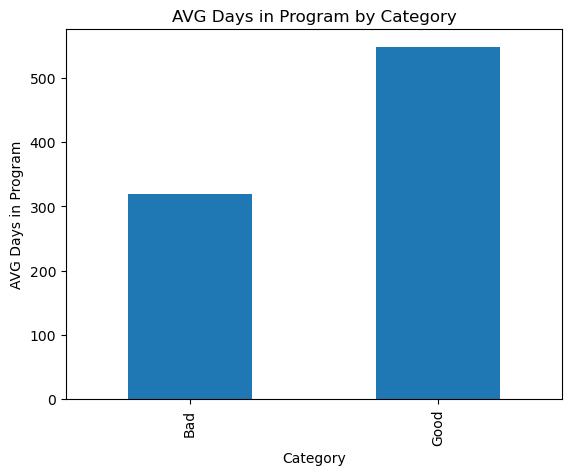

In [37]:
thp_groupby['Days_in_Program'].plot(kind='bar', rot=90)
plt.ylabel('AVG Days in Program')
plt.title('AVG Days in Program by Category')
plt.show()


### As the youth's average stay in the program increases their chances of successfully graduating from the program increase per the bar chart! 

In [ ]:
#Save to file 

In [38]:
remove_outliers.to_csv('new_clean_norm_outliers_rmv.csv')

In [40]:
#This version used for regression file<<if not then skip<<<<<
#not normalizing fraud_alert works better with odds ratios later on!
#outliers kept for regression analysis 
thp_df_not_normalized.to_csv('for_regression.csv')